In [52]:
#First thing first import libraries for reading data, plotting data, training data and using arrays.
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("keys of iris_dataset:\n", iris_dataset.keys())

keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [53]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [54]:
print("Target_names:",
     iris_dataset['target_names'])

Target_names: ['setosa' 'versicolor' 'virginica']


In [55]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [56]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [57]:
print("Shape of data:\n", iris_dataset['data'].shape)

Shape of data:
 (150, 4)


In [58]:
print("first five rows of data:\n", iris_dataset['data'][:5])

first five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [59]:
print("Type of target:\n",type(iris_dataset['target']))

Type of target:
 <class 'numpy.ndarray'>


In [60]:
print("Shape of target;\n",iris_dataset['target'].shape)

Shape of target;
 (150,)


In [61]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [62]:
#Split the dataset in to training amd testing to evaluate how well the model will generalize new data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state=0)

In [63]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)

X_train shape (112, 4)
y_train shape (112,)


In [64]:
print("X_test shape", X_test.shape)
print("y_train shape",y_train.shape)

X_test shape (38, 4)
y_train shape (112,)


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

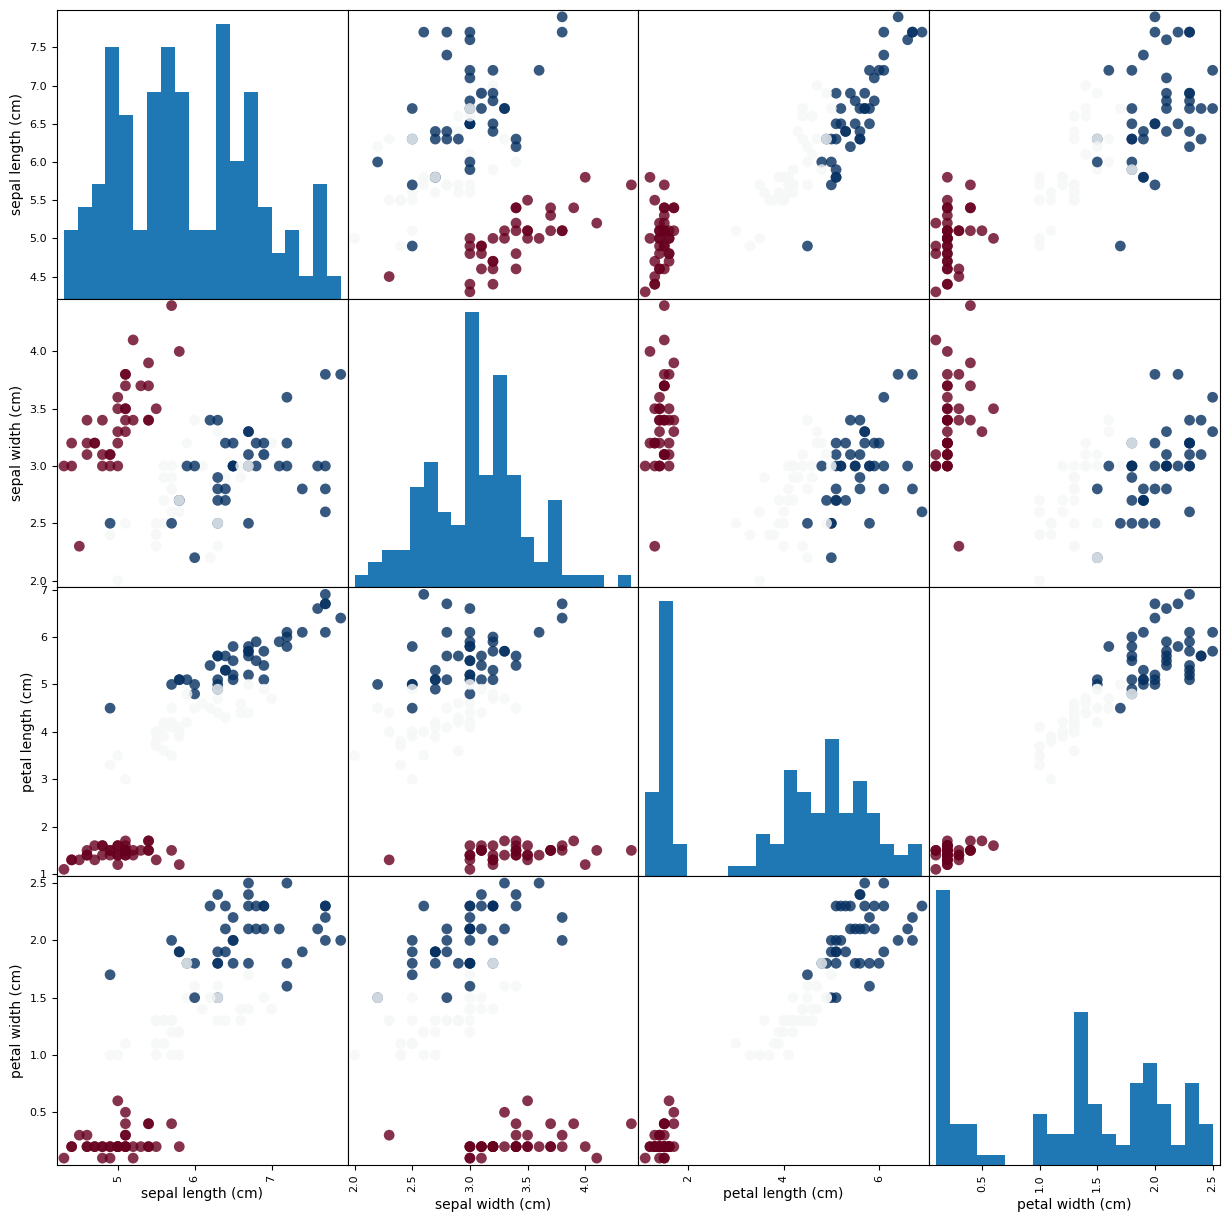

In [74]:
#mglearn had trouble installing so I used a different cmap.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
#Create a scatter matrix
pd.plotting.scatter_matrix(iris_dataframe,c=y_train, figsize=(15, 15),
                                                                     marker='o',
                                          hist_kwds={'bins': 20}, s=60,
                                                                     alpha=.8,
                                          cmap='RdBu')

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [76]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [78]:
prediction = knn.predict(X_new)
print("Prediction", prediction)
print("Predicted target name:",
     iris_dataset['target_names'][prediction])

Prediction [0]
Predicted target name: ['setosa']


In [79]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [80]:
print("Test score is:{:.2f}".format(np.mean(y_pred == y_test)))

Test score is:0.97


In [81]:
print("Test set score:{:.2f}".format(knn.score(X_test,y_test)))

Test set score:0.97
